# A Test of the Gambler's Fallacy

## Gambler's Dream
"If it lands on *Heads* a hundred times in a row, it most surely will land on *Tails* next!"

So says the gambler who believes in the [gambler's fallacy](https://en.wikipedia.org/wiki/Gambler%27s_fallacy).  As we know, this is not true.  Below is a little code showing what would happen if you followed the gambler's fallacy in a coin toss game, where you gain \$1.00 if you guess correctly, and lose \$1.00 if you guess incorrectly.

## The Contestants
There are four gamblers participating in a really long coin toss game.  They are:
- Random: Always chooses a random guess, regardless of previous occurences
- Heads Only: Always chooses heads
- Equal Probability: Will mostly choose the least frequent side
- Recent Probability: Will mostly choose the least frequent side over some past number of trials

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trial_length = 1000000
trial = np.random.randint(0,2,trial_length)

In [18]:
class Gambler:
    """Creates the gambler's fallacy better"""
    def __init__(self, sequence, strategy, window=10):
        self.sequence = sequence
        self.window = window
        self.results = []
        self.reward = 0
        self.reward_sequence = []
        if strategy == "whole":  # will look at whole history of flips
            self._whole()
            self._winnings()
        elif strategy == "window":  # will look only at a window of previous flips
            self._window()
            self._winnings()
    
    
    def _whole(self):
        epsilon = .30  # allows random choice in the beginning with little information; decays
        for i, flip in enumerate(self.sequence):
#             if i%10000 == 0:
#                 print("'Whole' currently at:",i)
            if i % 100 == 0:
                if epsilon > 0:  # epsilon decays
                    epsilon -= .05
                if epsilon < 0:  # to take care of floating point inprecision
                    epsilon = 0
            if i == 0:
                choice = np.random.randint(0,2)
            else:  # pick the less frequent side
                freq_heads = np.count_nonzero(self.sequence[:i]) / i
                if freq_heads > .5:  # more heads than tails
                    choice = np.random.choice([0,1], p=[1-epsilon, epsilon])
                else:  # more tails than heads
                    choice = np.random.choice([0,1], p=[epsilon, 1-epsilon])
            self.results.append(choice)
            
    
    def _window(self):
        epsilon = .30  # allows random choice in the beginning with little information; decays
        for i, flip in enumerate(self.sequence):
#             if i%10000 == 0:
#                 print("'Window currently at:",i)
            if i % 100 == 0:
                if epsilon > 0:  # epsilon decays
                    epsilon -= .05
                if epsilon < 0:  # to take care of floating point inprecision
                    epsilon = 0
            if i == 0:
                choice = np.random.randint(0,2)
            else:  # pick the less frequent side over the window
                freq_heads = np.count_nonzero(self.sequence[i-self.window:i]) / len(self.sequence[i-self.window:i]
                                                                                    if i >= self.window else self.sequence[0:i])
                if freq_heads > .5:  # more heads than tails in the window
                    choice = np.random.choice([0,1], p=[1-epsilon, epsilon])
                else:  # more tails than heads in the window
                    choice = np.random.choice([0,1], p=[epsilon, 1-epsilon])
            self.results.append(choice)
            
    
    def _winnings(self):
        for i, flip in enumerate(self.sequence):  # counts wins and losses
            if self.results[i] == flip:
                self.reward += 1
            else:
                self.reward -= 1
            self.reward_sequence.append(self.reward)
    
    def getResults(self, choices=False):
        if choices == True:
            return self.reward, self.reward_sequence, self.results
        else:
            return self.reward, self.reward_sequence

In [19]:
class RandomChoice:
    """Creates the random better"""
    def __init__(self, sequence):
        self.sequence = sequence
        self.results = np.random.randint(0,2,len(sequence))  # randomly guess always
        self.reward = 0
        self.reward_sequence = []
        self._winnings()
            
    
    def _winnings(self):
        for i, flip in enumerate(self.sequence):  # counts wins and losses
#             if i%10000 == 0:
#                 print("'Random' currently at:",i)
            if self.results[i] == flip:
                self.reward += 1
            else:
                self.reward -= 1
            self.reward_sequence.append(self.reward)
                
    
    def getResults(self, choices=False):
        if choices == True:
            return self.reward, self.reward_sequence, self.results
        else:
            return self.reward, self.reward_sequence

In [20]:
class Holdem:
    """Creates the random better"""
    def __init__(self, sequence):
        self.sequence = sequence
        self.results = np.ones(len(sequence))  # always choose 1
        self.reward = 0
        self.reward_sequence = []
        self._winnings()
            
    
    def _winnings(self):
        for i, flip in enumerate(self.sequence):  # counts wins and losses
#             if i%10000 == 0:
#                 print("'Hold' currently at:",i)
            if self.results[i] == flip:
                self.reward += 1
            else:
                self.reward -= 1
            self.reward_sequence.append(self.reward)
                
    
    def getResults(self, choices=False):
        if choices == True:
            return self.reward, self.reward_sequence, self.results
        else:
            return self.reward, self.reward_sequence

In [ ]:
%%time

random_gambler = RandomChoice(trial)
fallacy_gambler_whole = Gambler(trial, "whole")
fallacy_gambler_window = Gambler(trial, "window")
heads_gambler = Holdem(trial)

random_winnings, random_seq = random_gambler.getResults()
whole_winnings, whole_seq = fallacy_gambler_whole.getResults()
window_winnings, window_seq = fallacy_gambler_window.getResults()
heads_winnings, heads_seq = heads_gambler.getResults()

In [7]:
print("Random's winnings: {}\nAlways Heads winnings: {}\nFallacy Whole's winnings: {}\nFallacy Window's winnings: {}".format(
        random_winnings,heads_winnings,whole_winnings,window_winnings))

Random's winnings: 986
Always Heads winnings: 270
Fallacy Whole's winnings: -176
Fallacy Window's winnings: 516


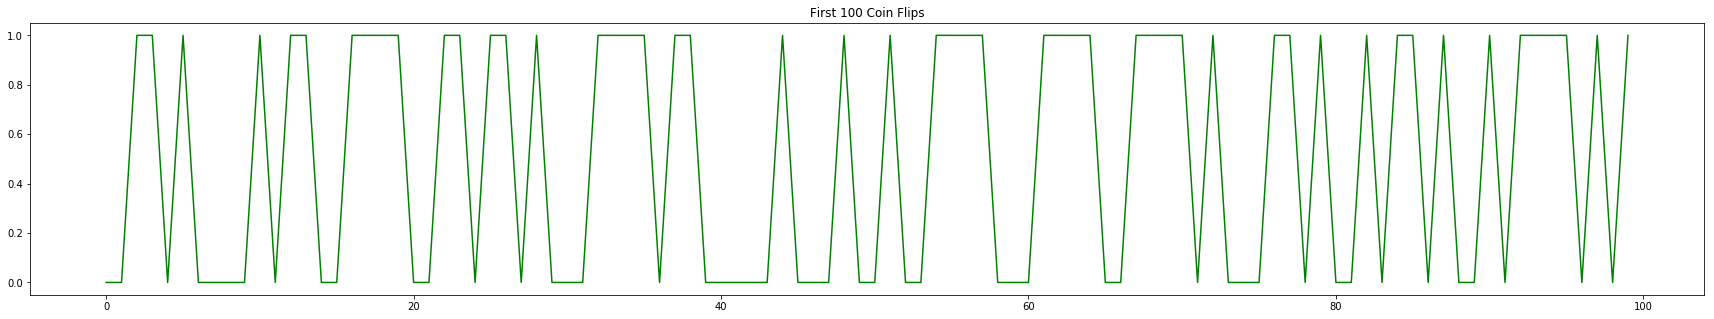

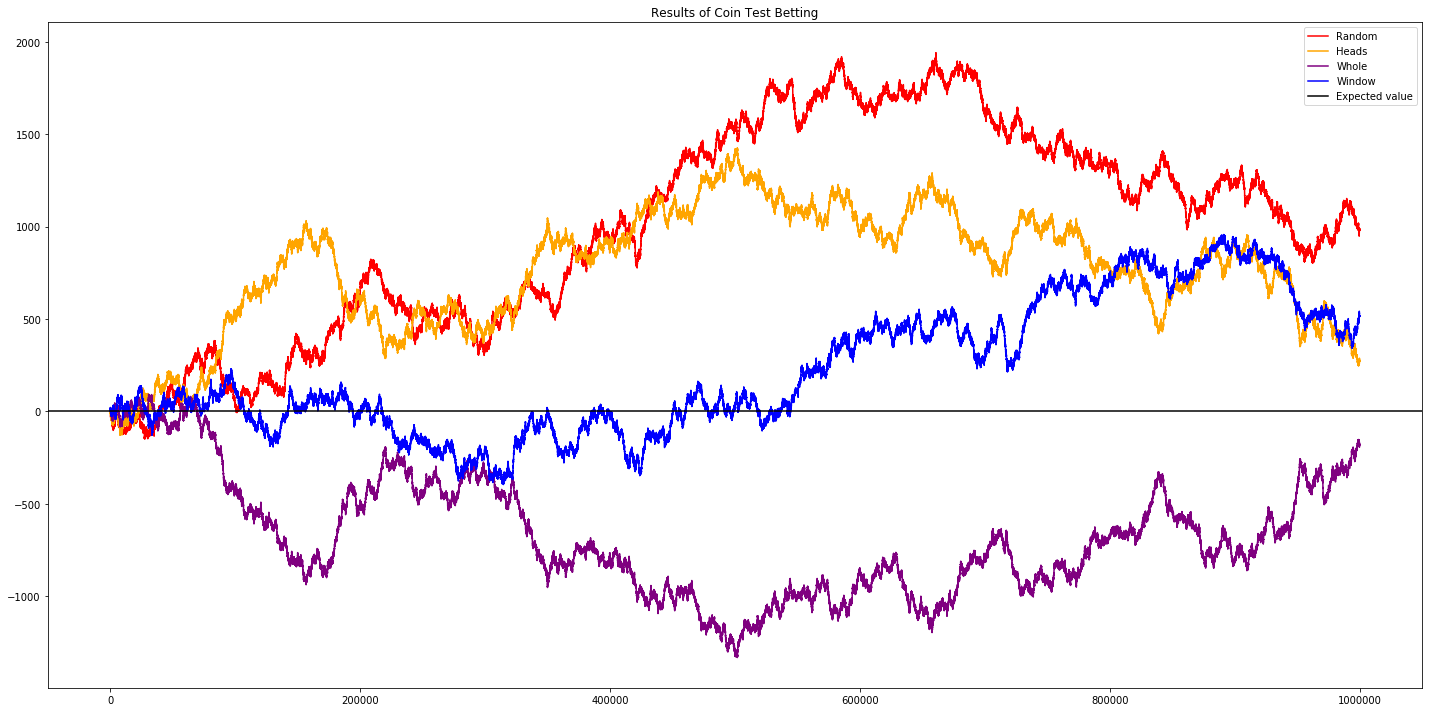

In [8]:
plt.figure(0)
plt.figure(figsize=(30,5))
plt.plot(np.arange(100), trial[:100], c='g', label="Coin flips")
plt.title("First 100 Coin Flips")
plt.legend
plt.show()

plt.figure(1)
plt.figure(figsize=(20,10))

plt.plot(np.arange(trial_length), random_seq, c='r', label="Random")
plt.plot(np.arange(trial_length), heads_seq, c='orange', label="Heads")
plt.plot(np.arange(trial_length), whole_seq, c="purple",label="Whole")
plt.plot(np.arange(trial_length), window_seq, c="b", label="Window")
plt.axhline(0,c='black', label="Expected value")
plt.title("Results of Coin Test Betting")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
prop_r = round(986/trial_length*100,2)
prop_wh = round(270/trial_length*100,2)
prop_wi = round(-176/trial_length*100,2)
prop_h = round(516/trial_length*100,2)

print("The proportion of gain compared to the max gain (correct on all trials, i.e. +${}):".format(trial_length))
print("Random: {}%\nFallacy Whole: {}%\nFallacy Window: {}%\nAlways Heads: {}%".format(prop_r, prop_wh, prop_wi, prop_h))

The proportion of gain compared to the max gain (correct on all trials, i.e. +$1000000):
Random: 0.1%
Fallacy Whole: 0.03%
Fallacy Window: -0.02%
Always Heads: 0.05%


In [22]:
random_winnings = []
whole_winnings = []
window_winnings = []
heads_winnings = []
for i in range(10000):
    if i%1000==0:
        print("Running iteration",i)
    trial = np.random.randint(0,2,100)
    random_gambler = RandomChoice(trial)
    fallacy_gambler_whole = Gambler(trial, "whole")
    fallacy_gambler_window = Gambler(trial, "window")
    heads_gambler = Holdem(trial)
    hw,_ = heads_gambler.getResults()
    rw,_ = random_gambler.getResults()
    whw,_ = fallacy_gambler_whole.getResults()
    wiw,_ = fallacy_gambler_window.getResults()
    random_winnings.append(rw)
    whole_winnings.append(whw)
    window_winnings.append(wiw)
    heads_winnings.append(hw)

Running iteration 0
Running iteration 1000
Running iteration 2000
Running iteration 3000
Running iteration 4000
Running iteration 5000
Running iteration 6000
Running iteration 7000
Running iteration 8000
Running iteration 9000


In [24]:
print("After {} trials, the average gain of each strategy is:".format(10000))
print("Random choice: {}\nAlways Heads: {}\nFallacy Whole: {}\nFallacy Window: {}".format(
        np.average(random_winnings),np.average(heads_winnings),np.average(whole_winnings),np.average(window_winnings)))

After 10000 trials, the average gain of each strategy is:
Random choice: 0.0554
Always Heads: 0.0484
Fallacy Whole: 0.123
Fallacy Window: 0.1572


## Conclusion
As can be seen, even though there's a considerable amount of randomness in gains and losses in each strategy, the profit taken from the potential profit is incredibly small.  If you for whatever reason do need to pick a strategy however, go with heads always.  It's the easiest to implement ;)